In [1]:
import numpy as np
import pandas as pd
import datetime


In [2]:
def runing_mean(ddt,window=5):

        run  = pd.DataFrame([])
        st   = ddt.index[0]
        #print(ddt.index[-1])
        for i in range(1,100000):
            if (st <= ddt.index[-window]):

                dt   = ddt[(ddt.index >= st) & (ddt.index  < st+datetime.timedelta(days=window-1))]

                dtt  = pd.DataFrame(dt.mean()).T
                #dtt['Datetime'] = st+datetime.timedelta(days=np.round(window/2,0)) 
                dtt['Datetime'] = st+datetime.timedelta(days= int(window/2.0))
                dtt.set_index('Datetime', inplace=True)
                run  = run.append(dtt)
                st   = st + datetime.timedelta(days=1)
                #print(i,st)
        return run
    
def lowpass_scipy(signal,sample_freq,time_period,keep_mean):
    import numpy as np
    import scipy as sc
    from scipy import fftpack
    
    lowpass_signal=np.zeros(signal.shape)
    if any(np.isnan(signal)):
        raise ValueError('There is NaN in the signal')
    else:
        hf = 1./time_period

        temp_fft = sc.fftpack.fft(signal)

        fftfreq = np.fft.fftfreq(len(signal),sample_freq) ### daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
          
        i1 = np.abs(fftfreq) >= hf  
        
        temp_fft[i1] = 0
        if not(keep_mean):
            temp_fft[0]=0
        lowpass_signal= np.real_if_close(sc.fftpack.ifft(temp_fft))
    
    return lowpass_signal


## CONV

In [3]:
# df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN/rmm1_conv_minmaxscale_1905_2015.csv')

df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN/deep_CNN_rmm1_minmaxscalar_batchsize_100_woymnmx.csv')
df1.columns = ['Datetime','rmm1']
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
# df1 = df1[['rmm1']] - .00216041
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()
# df11_conv[['rmm1']]/df11_conv['rmm1'].loc['1979-01-01':'2008-12-31'].std()

df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN/deep_CNN_rmm2_minmaxscalar_batchsize_100_woymnmx.csv')
df2.columns = ['Datetime','rmm1']

df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
# df2 = df2[['rmm2']] + 0.00576935

df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()


st = 1906
en = 2014

d1_conv = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_conv = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]

mjo_ind_conv = (d1_conv**2+d2_conv**2)**0.5

mjo_ind_conv_3yr = runing_mean(pd.DataFrame(mjo_ind_conv),window=365*10)

In [4]:
d1_conv.std(),d2_conv.std()

(0.9141466774663957, 0.9131589327333147)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


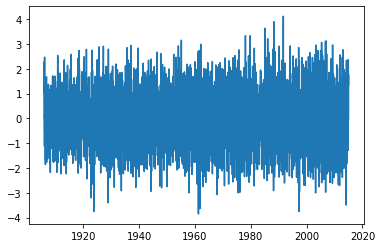

In [5]:
import matplotlib.pyplot as plt
#plt.plot(d2_lstm)
plt.plot(d1_conv)

#plt.plot(d1_ol)

## MLR

In [6]:
df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/multiple_regression/rmm1_MLR_org.txt')
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
# df1 = df1[['rmm1']] - .00216041
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()


df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/multiple_regression/rmm2_MLR_org.txt')
df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
# df2 = df2[['rmm2']] + 0.00576935

df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()


st = 1906
en = 2014

d1_mlr = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_mlr = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]

mjo_ind_mlr = (d1_mlr**2+d2_mlr**2)**0.5

mjo_ind_mlr_3yr = runing_mean(pd.DataFrame(mjo_ind_mlr),window=365*10)

In [7]:
d1_mlr.std(),d2_mlr.std()

(0.9211847665533914, 0.9176555601678564)

In [8]:
mjo_ind_mlr_3yr

,0
Datetime,
1910-12-31,0.989900
1911-01-01,0.989836
1911-01-02,0.989637
1911-01-03,0.989330
1911-01-04,0.988959
...,...
2009-12-29,1.217159
2009-12-30,1.217425
2009-12-31,1.217662


## oliver

In [9]:
df2 = pd.read_csv('/home/cccr/supriyo/panini/data/rmm_oliver_V3.csv')
df2['Datetime'] = df2.year.map(str) + '-' + df2.month.map(str) + '-'+df2.day.map(str) 
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)


d1_ol = df2['IHR1'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]
d2_ol = df2['IHR2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]

mjo_ind_ol = (d1_ol**2+d2_ol**2)**0.5
mjo_ind_ol_3yr = runing_mean(pd.DataFrame(mjo_ind_ol),window=365*10)

In [10]:
df2

,year,month,day,IHR1,IHR2,amplitude,phase
Datetime,,,,,,,
1905-01-01,1905,1,1,-0.31630,0.92124,0.97402,7
1905-01-02,1905,1,2,-0.25250,1.03970,1.06990,7
1905-01-03,1905,1,3,-0.22799,1.17100,1.19300,7
1905-01-04,1905,1,4,-0.24878,1.26160,1.28590,7
1905-01-05,1905,1,5,-0.28857,1.27590,1.30820,7
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,-0.18839,2.92390,2.93000,7
2015-12-28,2015,12,28,-0.67331,2.84920,2.92770,7
2015-12-29,2015,12,29,-1.24320,2.43040,2.72990,7


1.0017612705888617

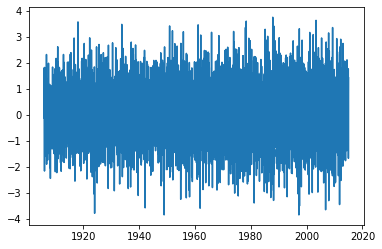

In [11]:
plt.plot(d1_ol)
d1_ol.std()

## WH04 RMM 

In [12]:
rmm         = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/20CRV2_analysis/rmm_index.csv')
rmm.columns = ['date','rmm1','rmm2']

rmm.index   = pd.to_datetime(rmm.date)
rmm = rmm.drop('date',axis=1)

st =1979 ;en =2015

d1_wh04 = rmm['rmm1'].loc[str(st)+'-01-01':str(en)+'-12-31']
d2_wh04 = rmm['rmm2'].loc[str(st)+'-01-01':str(en)+'-12-31']
d11=lowpass_scipy(d1_wh04,1,10,1)
d11 = pd.Series(d11,index=d1_wh04.index)

d22=lowpass_scipy(d2_wh04,1,10,1)
d22 = pd.Series(d22,index=d2_wh04.index)

mjo_ind_wh04 = (d11**2+d22**2)**0.5
mjo_ind_wh04_3yr = runing_mean(pd.DataFrame(mjo_ind_wh04),window=365*10)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


In [13]:
mjo_ind_wh04_3yr

,0
Datetime,
1983-12-31,1.256546
1984-01-01,1.256405
1984-01-02,1.256391
1984-01-03,1.256475
1984-01-04,1.256616
...,...
2010-12-29,1.239667
2010-12-30,1.240089
2010-12-31,1.240474


In [14]:
dff=pd.concat([mjo_ind_conv_3yr,mjo_ind_ol_3yr,mjo_ind_wh04_3yr,mjo_ind_mlr_3yr],axis=1)
# dff1=pd.concat([mjo_ind_conv_3yr,mjo_ind_wh04_3yr],axis=1)

(0.6, 1.75)

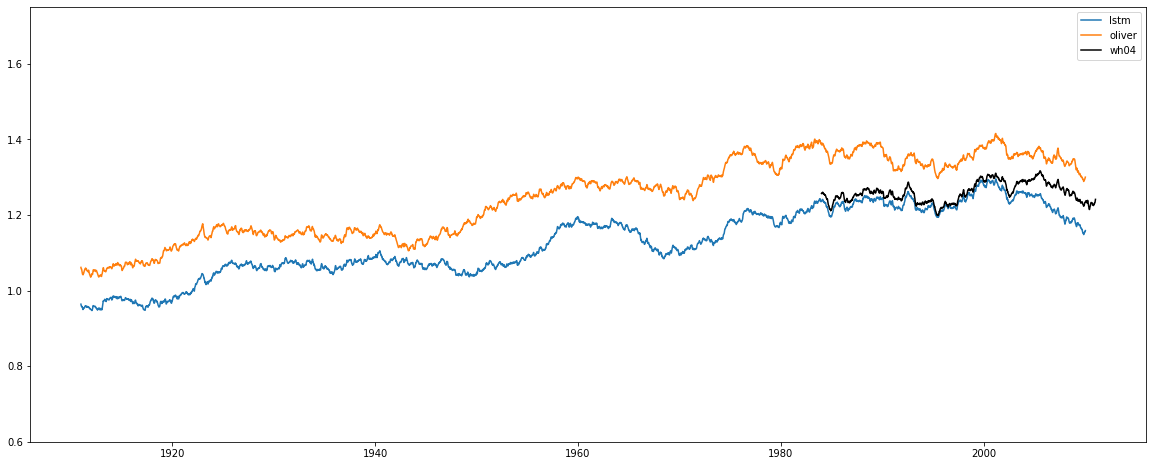

In [15]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,8))
ax.plot(dff.iloc[:,0],label='lstm')
ax.plot(dff.iloc[:,1],label='oliver')
# ax.plot(dff.iloc[:,3],label='mlr')

ax.plot(dff.iloc[:,2],'k',label='wh04')
ax.set_ylim([0.5,1.75])
plt.legend()

ax.set_ylim([0.6,1.75])
# ax.set_xlim(['1979-01-01','2015-01-01'])

In [16]:
from scipy import stats
cc = mjo_ind_conv.values.squeeze()*1
m_conv,_,_,p_conv,_ = stats.linregress(np.arange(1,len(cc)+1),cc)
oo = mjo_ind_ol.values.squeeze()*1
m_ol,_,_,p_ol,_ = stats.linregress(np.arange(1,len(oo)+1),oo)
m_conv,p_conv,m_ol,p_ol

(7.0163217664079984e-06,
 1.234922665847116e-136,
 8.130926683669989e-06,
 1.173287983972576e-161)

In [17]:
np.corrcoef(dff.iloc[:,0].loc['1982-01-01':'2012-12-31'],dff.iloc[:,2].loc['1982-01-01':'2012-12-31'])

array([[nan, nan],
       [nan, nan]])

In [18]:
np.corrcoef(dff.iloc[:,1].loc['1982-01-01':'2012-12-31'],dff.iloc[:,2].loc['1982-01-01':'2012-12-31'])

array([[nan, nan],
       [nan, nan]])

In [19]:
dff.iloc[:,2].loc['1979-01-01':'2008-12-31']

Datetime
1979-01-01         NaN
1979-01-02         NaN
1979-01-03         NaN
1979-01-04         NaN
1979-01-05         NaN
                ...   
2008-12-27    1.254104
2008-12-28    1.253654
2008-12-29    1.253279
2008-12-30    1.252984
2008-12-31    1.252748
Name: 0, Length: 10958, dtype: float64